Many countries are supporting Ukraine by introducing economic sanctions on Russia. There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting.

## Ukraine Russia War Twitter Sentiment Analysis using Python

The dataset that I am using for the task of Twitter sentiment analysis on the Ukraine and Russia War is downloaded from Kaggle. This dataset was initially collected from Twitter and is updated regularly.

Now let’s import the necessary Python libraries and the dataset to get started with this task:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Ukraine Russia War Twitter Sentiment Analysis using Python (NLP)\filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1521339525091500033  1520157427005595650  2022-05-03 04:03:02 UTC   
1  1521339524101640193  1521019921886494720  2022-05-03 04:03:02 UTC   
2  1521339521195024384  1518794227752259586  2022-05-03 04:03:01 UTC   
3  1521339517596319744  1521257995866447873  2022-05-03 04:03:00 UTC   
4  1521339517340377088  1518801364402380800  2022-05-03 04:03:00 UTC   

         date      time  timezone              user_id         username  \
0  2022-05-03  04:03:02         0  1518990106157371392  jonsakamoto1961   
1  2022-05-03  04:03:02         0             89652778    artisleilands   
2  2022-05-03  04:03:01         0            247619342     theansweryes   
3  2022-05-03  04:03:00         0             14223611  clovis_cormoran   
4  2022-05-03  04:03:00         0  1292456843630055425  jamessh91508847   

             name place  ... geo source user_rt_id user_rt retweet_id  \
0  Michael Berman   NaN  ... NaN    NaN    

Let’s have a quick look at all the column names of the dataset:

In [2]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:

In [3]:
data = data[["username", "tweet", "language"]]

Let’s have a look at whether any of these columns contains any null values or not:

In [4]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:

In [5]:
data["language"].value_counts()

en     8993
pt      367
und     154
it      121
in       93
ja       42
ru       33
es       24
hi       24
ca       23
de       14
fi       14
nl       12
ta       10
ur        9
ar        9
ro        9
tl        8
fr        8
zh        8
th        6
vi        5
et        4
cs        4
pl        3
ht        3
cy        2
gu        2
da        2
sv        2
tr        2
ml        1
no        1
lt        1
te        1
el        1
Name: language, dtype: int64

So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

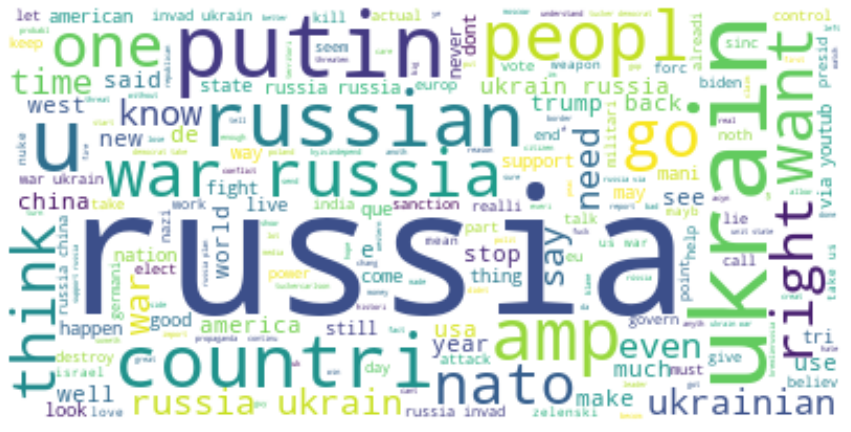

In [7]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  chrismulhearn monicacrowley aoc elonmusk nick ...     0.043     0.090   
1  lvrusemba mfarussia conslv rusembest rusemblt ...     0.143     0.139   
2  mjmusicear putin stay home russia stand ukrain...     0.000     0.000   
3  natashabertrand formal declar war russia mean ...     0.112     0.390   
4  libsoftiktok centralhspvd enriqueforri embarra...     0.118     0.137   

   Neutral  
0    0.867  
1    0.717  
2    1.000  
3    0.498  
4    0.745  


Now let’s have a look at the most frequent words used by people with positive sentiments:

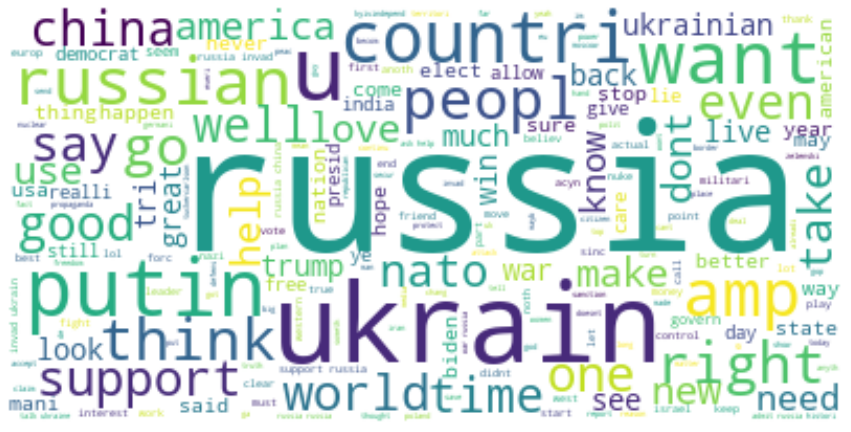

In [9]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments:

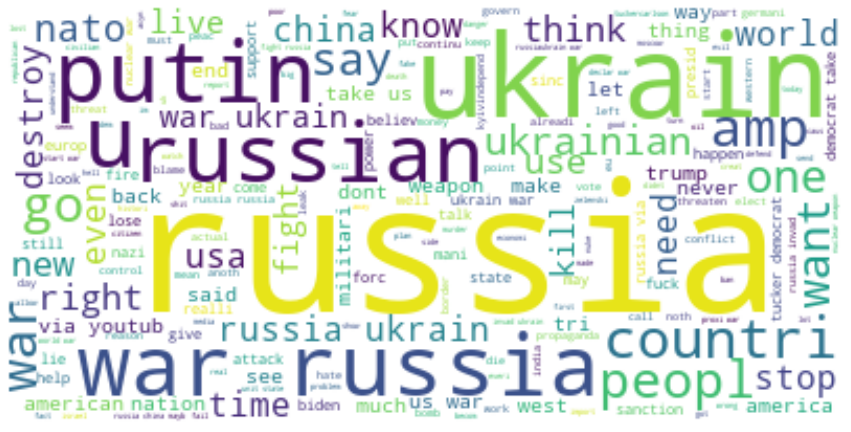

In [10]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Summary

There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. I used those tweets for the task of Twitter sentiment analysis on the Ukraine and Russia war.